In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')
df.columns = df.columns.str.strip()
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [11]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

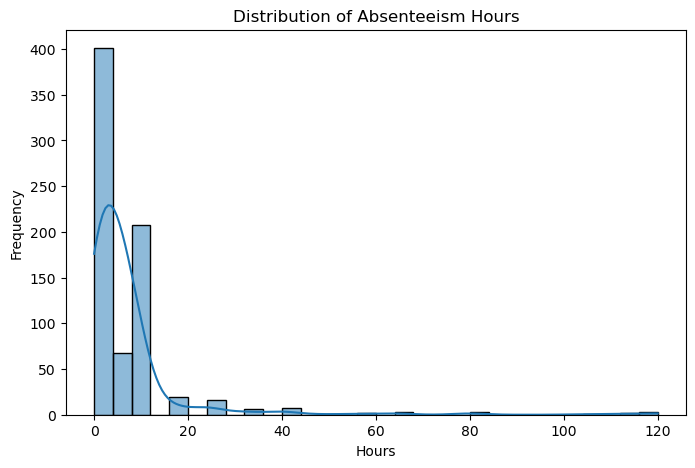

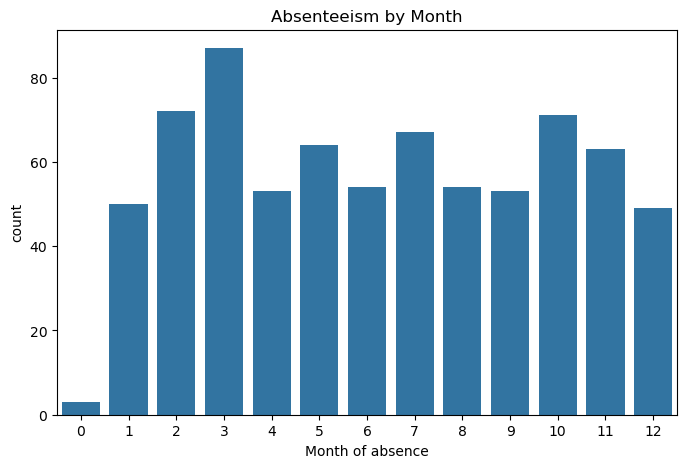

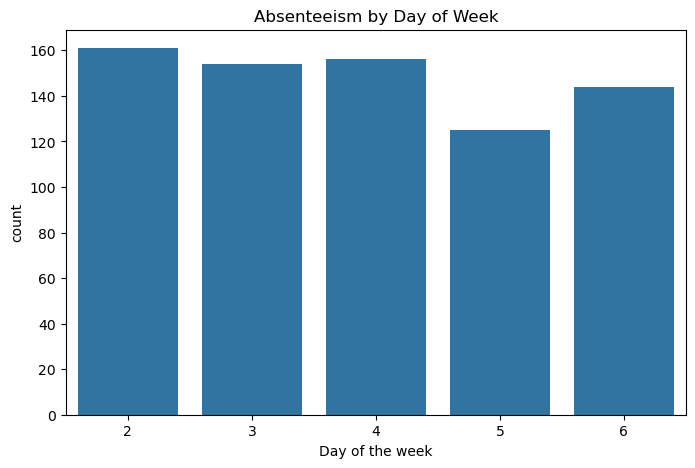

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Absenteeism time in hours'], bins=30, kde=True)
plt.title('Distribution of Absenteeism Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Month of absence', data=df)
plt.title('Absenteeism by Month')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Day of the week', data=df)
plt.title('Absenteeism by Day of Week')
plt.show()

Index(['ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours'], dtype='object')

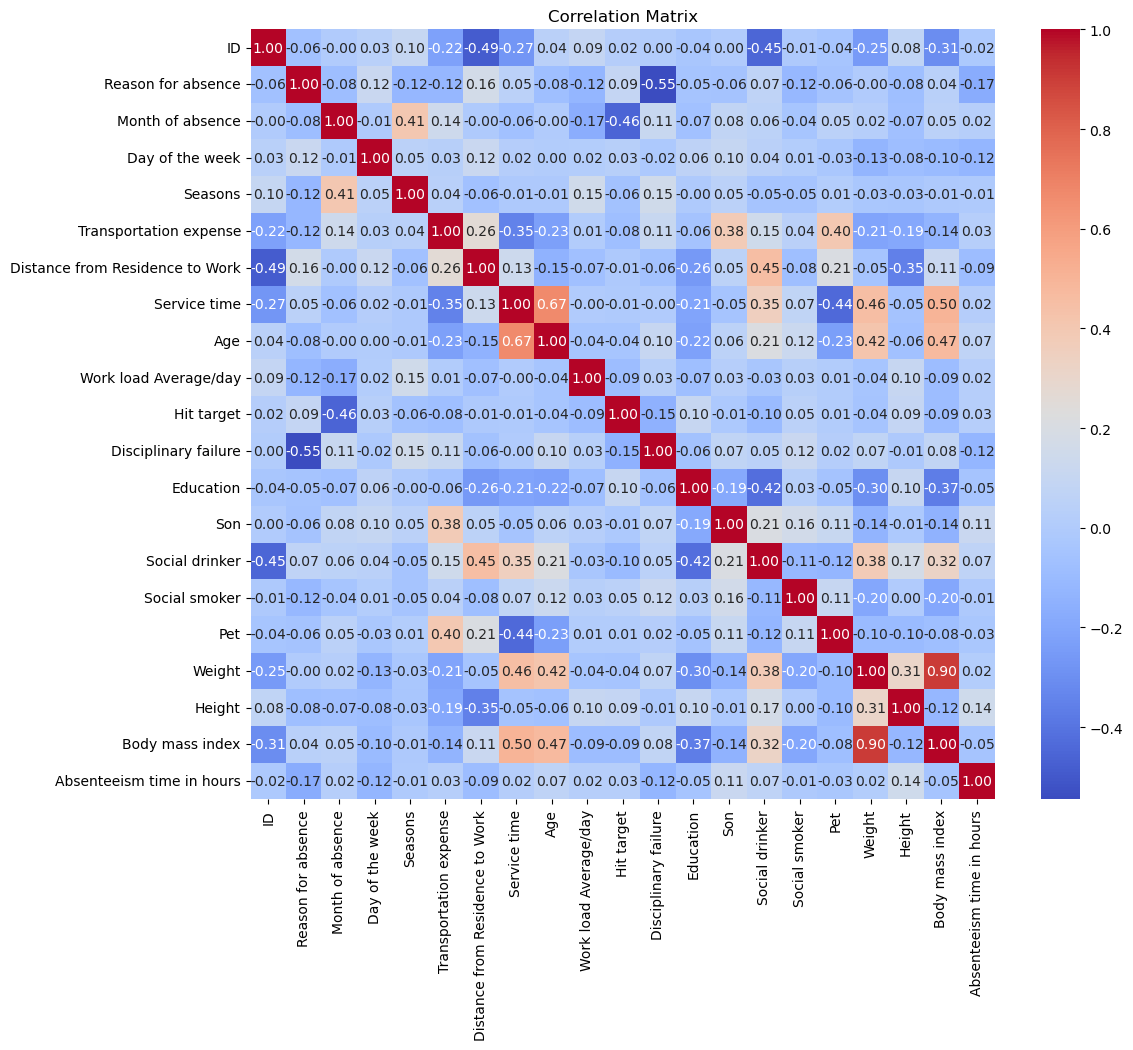

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

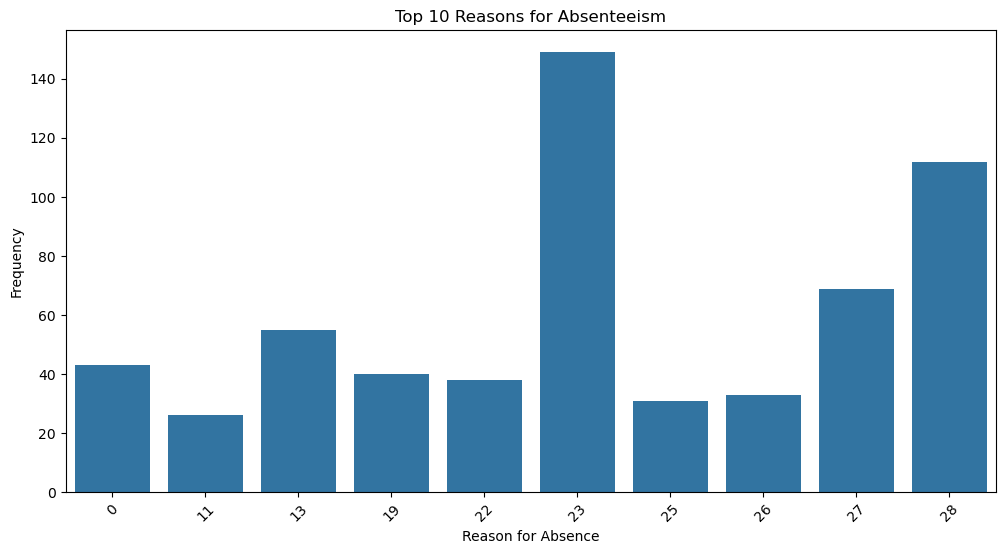

In [17]:
top_reasons = df['Reason for absence'].value_counts().head(10)
top_reasons_df = top_reasons.reset_index()
top_reasons_df.columns = ['Reason', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(x='Reason', y='Count', data=top_reasons_df)
plt.title('Top 10 Reasons for Absenteeism')
plt.xlabel('Reason for Absence')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


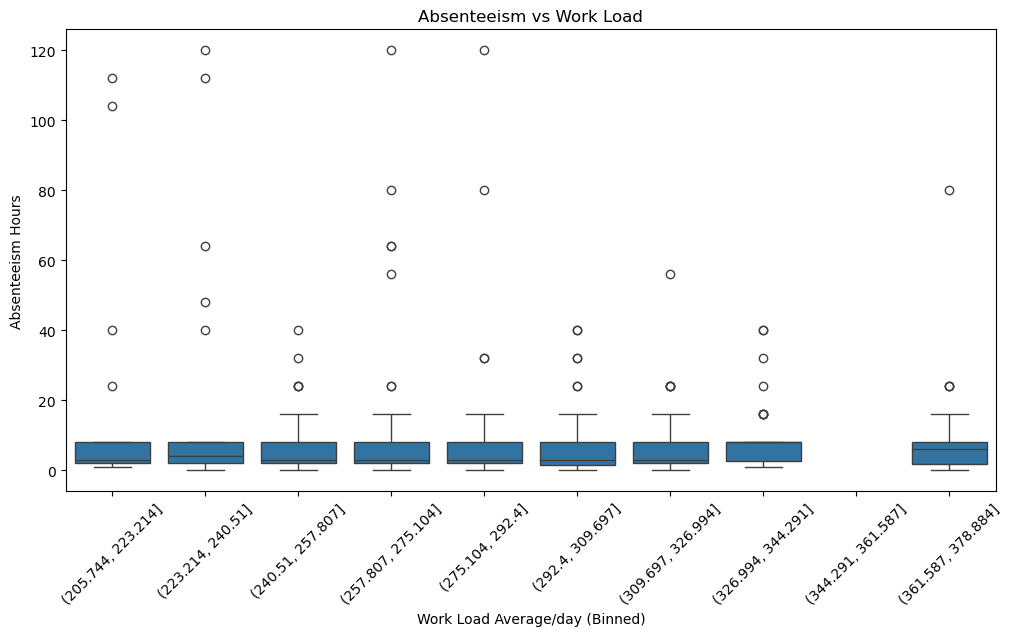

In [26]:
df['Workload_bin'] = pd.cut(df['Work load Average/day'], bins=10)
plt.figure(figsize=(12,6))
sns.boxplot(x='Workload_bin', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism vs Work Load')
plt.xlabel('Work Load Average/day (Binned)')
plt.ylabel('Absenteeism Hours')
plt.xticks(rotation=45)
plt.show()